### Import modules

In [1]:
# Standard imports
import pandas as pd
import sys 
import os
import seaborn as sns
import os
import shutil

# # change directory to 'master_study/analysis'
# os.chdir('master_study/analysis')

# Local imports
import analysis_functions 

# Apply better style
analysis_functions.apply_heatmap_style()



In [2]:
# Define study
STUDY_NAME = "tune_xing_scan_50cm_2024_agressive"
COLLIDER = "base_collider"
PARQUET_PATH = f"../scans/{STUDY_NAME}/da.parquet"
CONF_MAD_PATH = f"../scans/{STUDY_NAME}/{COLLIDER}/config.yaml"
CONF_COLLIDER_PATH = f"../scans/{STUDY_NAME}/{COLLIDER}/xtrack_0008/config_final.yaml"

# SAve study on EOS
SAVE_STUDY_EOS = False
# Load dataframe
df = pd.read_parquet(f"../scans/{STUDY_NAME}/da.parquet")

# Round all numbers to 3 decimals
df = df.round(3)

# Get on_x1
df = df.reset_index(level=4)

df


on_x1  \
beam  name base collider qx     qy     num_particles_per_bunch          
lhcb1 base_collider      62.305 60.310 180000000.0               80.0   
                                       180000000.0               90.0   
                                       180000000.0              100.0   
                                       180000000.0              110.0   
                                       180000000.0              120.0   
...                                                               ...   
                         62.329 60.334 180000000.0              110.0   
                                       180000000.0              120.0   
                                       180000000.0              130.0   
                                       180000000.0              140.0   
                                       180000000.0              150.0   

                                                                normalized amplitude in xy-plane  \
beam  name base collider qx     qy     num_particles_per_bunch                                     
lhcb1 base_collider      62.305 60.310 180000000.0                                         8.500   
                                       180000000.0                                         8.062   
                                       180000000.0                                         9.625   
                                       180000000.0                                         9.000   
                                       180000000.0                                        10.938   
...                                                                                          ...   
                         62.329 60.334 180000000.0                                         4.000   
                                       180000000.0                                         4.000   
                                       180000000.0                                         4.000   
                                       180000000.0                                         4.000   
                                       180000000.0                                         4.000   

                                                                    qx  \
beam  name base collider qx     qy     num_particles_per_bunch           
lhcb1 base_collider      62.305 60.310 180000000.0              62.305   
                                       180000000.0              62.305   
                                       180000000.0              62.305   
                                       180000000.0              62.305   
                                       180000000.0              62.305   
...                                                                ...   
                         62.329 60.334 180000000.0              62.329   
                                       180000000.0              62.329   
                                       180000000.0              62.329   
                                       180000000.0              62.329   
                                       180000000.0              62.329   

                                                                    qy   dqx  \
beam  name base collider qx     qy     num_particles_per_bunch                 
lhcb1 base_collider      62.305 60.310 180000000.0              60.310  10.0   
                                       180000000.0              60.310  10.0   
                                       180000000.0              60.310  10.0   
                                       180000000.0              60.310  10.0   
                                       180000000.0              60.310  10.0   
...                                                                ...   ...   
                         62.329 60.334 180000000.0              60.334  10.0   
                                       180000000.0              60.334  10.0   
                                       180000000.0

In [3]:
# Reshape for plotting
df_to_plot = df.pivot(index="qy", columns="on_x1", values="normalized amplitude in xy-plane")
df_to_plot


on_x1,80.0,90.0,100.0,110.0,120.0,130.0,140.0,150.0
qy,,,,,,,,
60.310,8.500,8.062,9.625,9.000,10.938,12.062,12.125,11.125
60.311,9.000,8.625,8.812,9.000,10.812,10.500,10.812,11.875
60.312,8.938,9.312,10.062,10.312,9.875,11.188,10.500,11.625
60.313,10.312,8.875,9.875,10.688,9.812,9.875,9.500,11.000
60.314,10.250,9.938,10.250,10.875,11.625,9.688,11.812,12.438
60.315,10.312,9.500,11.250,10.500,11.500,11.375,11.750,11.000
60.316,9.562,9.688,10.688,11.750,10.688,11.750,11.188,12.062
60.317,9.625,10.750,9.750,11.125,11.125,11.125,11.438,12.062
60.318,10.875,11.375,10.250,11.438,10.438,11.250,11.750,12.438


In [4]:
# Convert on_x1 to delta
df_to_plot.columns = 150  - df_to_plot.columns
df_to_plot.columns = - df_to_plot.columns

In [5]:
# Interpolate to fill internal missing values (do not extrapolate)
# df_to_plot = df_to_plot.interpolate(method='slinear', limit = 1)

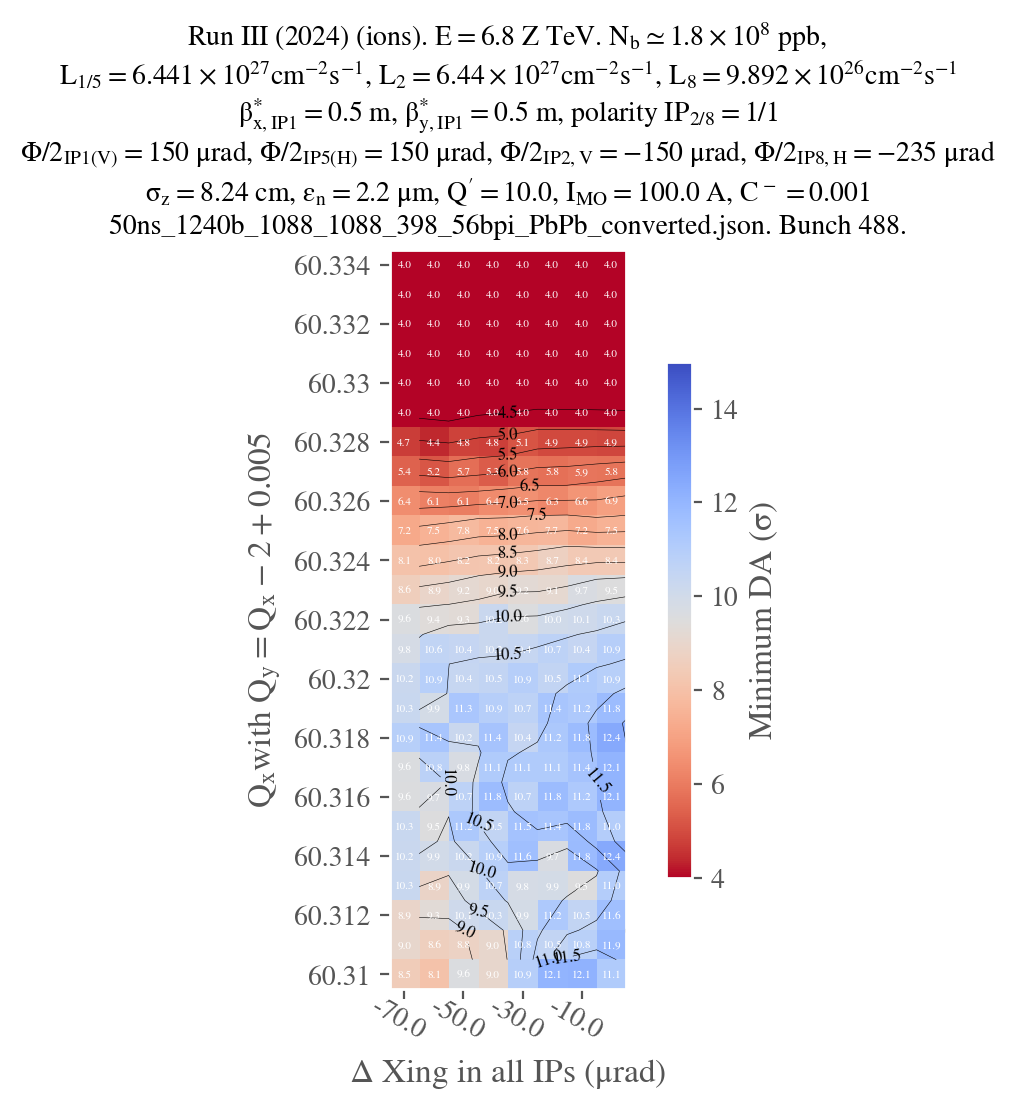

In [6]:
# Load configuration files
conf_mad = analysis_functions.load_config(CONF_MAD_PATH)['config_mad']
conf_collider = analysis_functions.load_config(CONF_COLLIDER_PATH)["config_collider"]

xlabel = r"$\Delta$ Xing in all IPs ($\mu$rad)"
ylabel = r"$Q_x$" + "with " + r"$Q_y = Q_x -2 + 0.005$"

analysis_functions.plot_heatmap(
    df_to_plot,
    STUDY_NAME + '_' + COLLIDER,
    link=None,
    plot_contours=True,
    conf_mad=conf_mad,
    conf_collider=conf_collider,
    type_crossing="flatvh",
    betx=0.5,
    bety=0.5,
    Nb = True,
    green_contour = 2,
    extended_diagonal=False,
    #small_ext_diagonal=True,
    vmin = 4,
    vmax = 15.,
    smooth_symmetry = False,
    xlabel = xlabel,
    ylabel = ylabel,
    xaxis_on_top = False,
    plot_diagonal=False,
)
if SAVE_STUDY_EOS:
    path_archive, path_EOS = analysis_functions.copy_study_on_eos(STUDY_NAME)
    #analysis_functions.archive_and_clean(path_archive, path_EOS)